## Appendix

### Appendix 1 Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pystan

In [2]:
data_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQNXY6xTRRknm8q37iLmpo4wJzFiHrtwn_W1EwwywCBNS67KT1TusFWweRWaQKH-0l-KotykZ3wkeks/pub?gid=1459555462&single=true&output=csv'

In [3]:
country_mapping = {'Ukraine': 1, 'Bangladesh': 2, 'Kenya': 3, 'Brazil': 4, 'Canada': 5, 'Sweden': 6, 'USA': 7}
country_mapping_reversed = {value : key for (key, value) in country_mapping.items()}
country_mapper = lambda x: country_mapping[x]
perception_mapping = {'Budget (cheap)': 1, 'Mid-range': 2, 'Luxury (expensive)': 3}
perception_mapper = lambda x: perception_mapping[x]
perception_mapping_reversed = {value : key for (key, value) in perception_mapping.items()}

### Appendix 2 - Reading Data

In [4]:
df = pd.read_csv(
    data_url,
    usecols=[
        'country',
        'perception',
        'rent_normalized',
        'apples_1_price_normalized', 'apples_2_price_normalized', 'apples_3_price_normalized',
        'bananas_1_price_normalized', 'bananas_2_price_normalized', 'bananas_3_price_normalized',
        'tomatoes_1_price_normalized', 'tomatoes_2_price_normalized', 'tomatoes_3_price_normalized',
        'potatoes_1_price_normalized', 'potatoes_2_price_normalized', 'potatoes_3_price_normalized',
        'flour_1_price_normalized', 'flour_2_price_normalized', 'flour_3_price_normalized',
        'rice_1_price_normalized', 'rice_2_price_normalized', 'rice_3_price_normalized',
        'milk_1_price_normalized', 'milk_2_price_normalized', 'milk_3_price_normalized',
        'butter_1_price_normalized', 'butter_2_price_normalized', 'butter_3_price_normalized',
        'eggs_1_price_normalized', 'eggs_2_price_normalized', 'eggs_3_price_normalized',
        'chicken_1_price_normalized', 'chicken_2_price_normalized', 'chicken_3_price_normalized'
    ],
    na_values=0,  # Replace all 0's with NA values,
    converters={
        'country': country_mapper,
        'perception': perception_mapper
    },
    thousands=','  # The character used as the separator for thousands
)
df

,country,perception,rent_normalized,apples_1_price_normalized,apples_2_price_normalized,apples_3_price_normalized,bananas_1_price_normalized,bananas_2_price_normalized,bananas_3_price_normalized,tomatoes_1_price_normalized,...,milk_3_price_normalized,butter_1_price_normalized,butter_2_price_normalized,butter_3_price_normalized,eggs_1_price_normalized,eggs_2_price_normalized,eggs_3_price_normalized,chicken_1_price_normalized,chicken_2_price_normalized,chicken_3_price_normalized
0,5,1,1162.23,2.80,2.94,2.80,1.39,2.09,3.51,6.17,...,2.83,7.93,11.46,13.22,0.40,0.36,0.38,18.54,21.71,16.77
1,5,1,1242.39,5.29,3.53,7.05,1.36,1.60,5.29,5.29,...,1.06,7.75,10.05,13.58,0.36,0.50,0.51,6.17,9.70,19.41
2,7,2,2996.00,3.45,2.64,2.20,1.97,2.08,NaN,7.03,...,2.39,5.33,8.20,14.30,0.14,0.13,0.33,13.19,7.57,4.68
3,7,3,3360.00,5.48,6.59,8.79,1.08,3.28,4.38,4.38,...,5.25,9.98,18.64,19.96,0.72,0.50,0.48,10.99,13.19,15.40
4,7,1,4000.00,4.38,2.62,2.18,1.30,1.52,1.74,2.84,...,0.53,8.13,9.89,10.99,0.33,0.37,0.25,13.19,4.85,9.89
5,7,3,4000.00,9.00,4.76,NaN,4.13,NaN,NaN,4.17,...,5.42,39.60,16.23,26.39,0.50,0.46,NaN,47.00,NaN,NaN
6,6,1,812.17,3.42,3.54,2.36,2.95,3.18,3.30,3.77,...,1.02,9.20,9.20,11.09,0.35,0.29,0.34,12.75,16.45,11.47
7,6,2,812.17,2.36,3.42,3.42,3.42,NaN,NaN,3.77,...,NaN,9.43,9.91,11.79,0.23,0.26,0.28,17.59,13.10,18.28
8,1,1,144.73,1.03,0.87,0.90,1.03,1.09,1.21,1.81,...,0.83,7.96,8.49,8.83,0.12,0.10,0.14,3.98,4.19,4.02
9,1,2,361.82,1.27,1.25,1.08,1.34,1.23,1.23,2.20,...,2.03,11.58,12.60,16.70,0.16,0.14,0.14,4.70,4.34,4.54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      53 non-null     int64  
 1   perception                   53 non-null     int64  
 2   rent_normalized              53 non-null     float64
 3   apples_1_price_normalized    53 non-null     float64
 4   apples_2_price_normalized    48 non-null     float64
 5   apples_3_price_normalized    40 non-null     float64
 6   bananas_1_price_normalized   53 non-null     float64
 7   bananas_2_price_normalized   44 non-null     float64
 8   bananas_3_price_normalized   29 non-null     float64
 9   tomatoes_1_price_normalized  53 non-null     float64
 10  tomatoes_2_price_normalized  44 non-null     float64
 11  tomatoes_3_price_normalized  38 non-null     float64
 12  potatoes_1_price_normalized  53 non-null     float64
 13  potatoes_2_price_norma

In [6]:
products = {
    # Product name: list of product values
}

only_prices = df[
    df.columns[
        ~df.columns.isin(
            ['country','perception','rent_normalized']  # Excluded columns
        )
    ]
]

# Concatenate all the different brands of a given product
for col in only_prices:
    product_name = col.split('_')[0]
    product_values = products.get(product_name, [])
    product_values.extend(list(df[col]))
    products[product_name] = product_values

# Given we concatenated the values on top of each other
# we can concatenate the other values too
products['country'] = list(df['country'])*3
products['perception'] = list(df['perception'])*3
products['rent_normalized'] = list(df['rent_normalized'])*3
    
data = pd.DataFrame(products)
data

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken,country,perception,rent_normalized
0,2.80,1.39,6.17,3.53,2.40,6.51,2.60,7.93,0.40,18.54,5,1,1162.23
1,5.29,1.36,5.29,2.48,1.04,2.32,3.36,7.75,0.36,6.17,5,1,1242.39
2,3.45,1.97,7.03,1.14,1.63,5.79,1.16,5.33,0.14,13.19,7,2,2996.00
3,5.48,1.08,4.38,2.18,3.52,4.96,1.53,9.98,0.72,10.99,7,3,3360.00
4,4.38,1.30,2.84,0.66,2.19,4.95,0.92,8.13,0.33,13.19,7,1,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2.50,1.66,NaN,1.30,0.88,1.65,1.85,7.76,0.17,7.76,7,1,2200.00
155,1.67,1.50,5.49,2.99,4.66,5.33,2.66,15.96,0.58,6.30,7,1,2695.00
156,4.66,1.66,4.99,1.99,0.96,3.09,2.55,6.62,0.17,7.99,7,2,2705.00
157,NaN,NaN,8.79,4.38,NaN,NaN,NaN,NaN,0.62,NaN,7,2,2750.00


In [7]:
means = data[
    data.columns[
        ~data.columns.isin(
            ['country','perception','rent_normalized']  # Excluded columns
        )
    ]
].mean(skipna=True)
means

apples       4.216312
bananas      2.260952
tomatoes     5.324593
potatoes     2.666377
flour        2.692535
rice         4.404820
milk         1.777714
butter      12.204444
eggs         0.414965
chicken      9.407852
dtype: float64

In [8]:
stds = data[
    data.columns[
        ~data.columns.isin(
            ['country','perception','rent_normalized']  # Excluded columns
        )
    ]
].std(skipna=True)
stds

apples      2.557823
bananas     1.886121
tomatoes    4.192979
potatoes    2.671360
flour       4.681932
rice        2.844737
milk        1.132162
butter      6.534561
eggs        0.482004
chicken     6.151341
dtype: float64

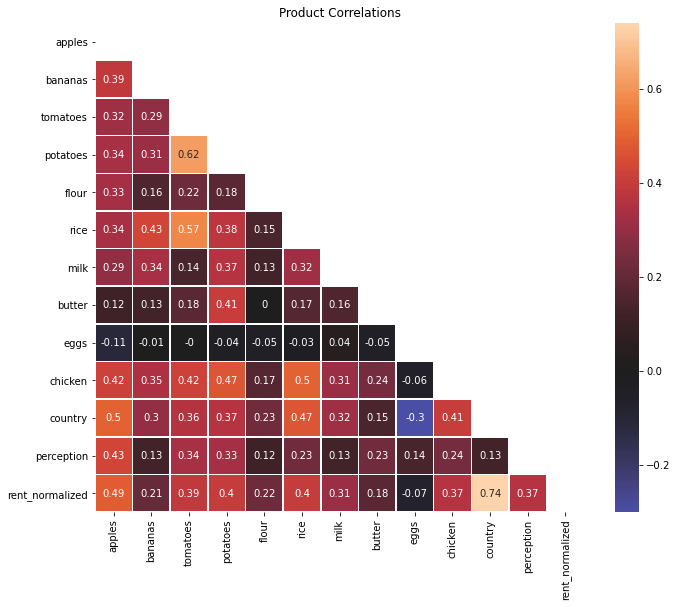

In [9]:
# Compute the correlation matrix
corr = data.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, center=0,
            square=True, linewidths=.5)
plt.title("Product Correlations")
plt.savefig('corr.png')
plt.show()

In [10]:
means_perception = data[
    data.columns[
        ~data.columns.isin(
            ['country','rent_normalized']  # Excluded columns
        )
    ]
].groupby('perception').mean()

means_perception.index = means_perception.index.map(lambda x: perception_mapping_reversed[x])
means_perception

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
perception,,,,,,,,,,
Budget (cheap),3.135833,2.113778,4.004444,1.951702,2.005625,3.945652,1.825870,10.735870,0.309783,8.877174
Mid-range,4.284545,2.164627,5.248904,2.504324,2.919873,4.221688,1.542632,12.187125,0.459750,8.379467
Luxury (expensive),7.129375,3.195000,9.144118,5.347647,3.693333,6.606250,2.647222,16.034444,0.488824,16.660714


In [11]:
means_country = data[
    data.columns[
        ~data.columns.isin(
            ['perception','rent_normalized']  # Excluded columns
        )
    ]
].groupby('country').mean()

means_country.index = means_country.index.map(lambda x: country_mapping_reversed[x])
means_country

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
country,,,,,,,,,,
Ukraine,0.952500,1.236667,2.657500,0.488333,0.759167,2.263333,1.164167,9.935833,1.289167,4.183333
Bangladesh,1.896000,0.548000,0.320000,0.258000,0.392000,0.855000,1.070000,11.400000,0.100000,3.161667
Kenya,3.326667,0.870000,0.690000,1.110000,0.566667,1.710000,0.840000,12.503333,0.143333,6.630000
Brazil,2.421429,1.032500,1.333333,1.062000,0.848182,1.104000,0.830000,10.252000,0.121000,2.657000
Canada,4.068333,2.540000,7.638333,2.830000,2.306667,6.005000,2.205000,10.665000,0.418333,15.383333
Sweden,3.086667,3.212500,5.236000,1.575000,1.356667,3.904000,1.290000,10.103333,0.291667,14.940000
USA,4.938529,2.556444,6.104141,3.225149,3.416768,5.239794,2.020306,12.892913,0.373700,10.528172


In [12]:
def get_relative_prices(df: pd.DataFrame, means: pd.Series = means) -> pd.DataFrame:
    """
    Finds the relative prices of products by comparing them with the mean 
    of the complete dataset.
    """
    new_df = df.copy()
    for col in new_df:
        new_df[col] = new_df[col] / means[col]
    return new_df

In [13]:
get_relative_prices(means_perception)

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
perception,,,,,,,,,,
Budget (cheap),0.743738,0.934906,0.752066,0.731968,0.744883,0.895758,1.027088,0.879669,0.746527,0.943592
Mid-range,1.016183,0.957396,0.985785,0.939224,1.084433,0.958425,0.867761,0.998581,1.107925,0.890689
Luxury (expensive),1.690903,1.413121,1.717337,2.005586,1.371694,1.499777,1.489116,1.313820,1.177987,1.770937


In [14]:
get_relative_prices(means_country)

,apples,bananas,tomatoes,potatoes,flour,rice,milk,butter,eggs,chicken
country,,,,,,,,,,
Ukraine,0.225908,0.546967,0.499099,0.183145,0.281952,0.513831,0.654867,0.814116,3.106687,0.444664
Bangladesh,0.449682,0.242376,0.060098,0.096761,0.145588,0.194106,0.601896,0.934086,0.240984,0.336067
Kenya,0.788999,0.384794,0.129587,0.416295,0.210458,0.388211,0.472517,1.024490,0.345411,0.704730
Brazil,0.574300,0.456666,0.250410,0.398293,0.315012,0.250635,0.466892,0.840022,0.291591,0.282424
Canada,0.964903,1.123420,1.434539,1.061365,0.856690,1.363279,1.240357,0.873862,1.008117,1.635159
Sweden,0.732077,1.420861,0.983362,0.590689,0.503862,0.886302,0.725651,0.827840,0.702870,1.588035
USA,1.171291,1.130694,1.146405,1.209562,1.268978,1.189559,1.136463,1.056411,0.900558,1.119084


In [15]:
stan_code = '''
data {
    int<lower=0> N;
    vector[N] countries;
    vector[N] perceptions;
    vector[N] prices;
    real<lower=0> base_price_mean;
    real base_price_std;
}
parameters {
    real country_multiplier;
    real perception_multiplier;
    real<lower=0> sigma;
    real base_price;
}
model {
    // Priors
    // 3 and 4 are the middle countries
    country_multiplier ~ normal(1, 0.25);
    // 2 is midrange
    perception_multiplier ~ normal(1, 0.25);
    
    base_price ~ normal(base_price_mean, base_price_std);
    
    
    # Likelihood
    prices ~ normal(base_price + country_multiplier * countries + perception_multiplier * perceptions, sigma);
}
'''

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9dff9aa8e31162a4587132de3f35b377 NOW.


In [16]:
cleaned_data = data.dropna() # Stan doesn't work with NA values
# Results
stan_data = {
    'N': len(cleaned_data),
    'countries': cleaned_data['country'],
    'perceptions': cleaned_data['perception'],
    'prices': cleaned_data['apples'],
    'base_price_mean': means['apples'],
    'base_price_std' : stds['apples']
}
results_apples = stan_model.sampling(data=stan_data)
print(results_apples)

Inference for Stan model: anon_model_9dff9aa8e31162a4587132de3f35b377.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
country_multiplier      0.63  1.8e-3   0.08   0.47   0.57   0.63   0.68   0.79   2114    1.0
perception_multiplier   1.08  3.8e-3   0.19   0.71   0.95   1.09   1.21   1.46   2530    1.0
sigma                   1.97  2.4e-3   0.13   1.73   1.87   1.96   2.06   2.25   3203    1.0
base_price             -1.36    0.01   0.58  -2.46  -1.75  -1.35  -0.97  -0.21   1948    1.0
lp__                  -133.3    0.03   1.41 -136.8 -133.9 -132.9 -132.2 -131.5   1740    1.0

Samples were drawn using NUTS at Sun Mar 14 18:41:27 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [17]:
means['apples']

4.216312056737588

In [18]:
def get_product_posterior(product_name: str) -> str:
    """
    """
    cleaned_data = data.dropna() # Stan doesn't work with NA values
    # Results
    stan_data = {
        'N': len(cleaned_data),
        'countries': cleaned_data['country'],
        'perceptions': cleaned_data['perception'],
        'prices': cleaned_data[product_name],
        'base_price_mean': means[product_name],
        'base_price_std' : stds[product_name]
    }
    return stan_model.sampling(data=stan_data)

In [19]:
get_product_posterior('rice')

Inference for Stan model: anon_model_9dff9aa8e31162a4587132de3f35b377.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
country_multiplier      0.58  2.1e-3    0.1   0.38   0.51   0.58   0.65   0.78   2238    1.0
perception_multiplier   0.85  3.6e-3   0.21   0.45   0.71   0.85   0.99   1.24   3348    1.0
sigma                   2.42  3.1e-3   0.16   2.12   2.31   2.41   2.52   2.77   2867    1.0
base_price              -0.4    0.02    0.7  -1.79  -0.87  -0.39   0.06   0.98   2141    1.0
lp__                  -155.3    0.04   1.46 -159.2 -155.9 -155.0 -154.3 -153.5   1657    1.0

Samples were drawn using NUTS at Sun Mar 14 18:41:28 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [20]:
get_product_posterior('eggs')

Inference for Stan model: anon_model_9dff9aa8e31162a4587132de3f35b377.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
country_multiplier      -0.1  4.9e-4   0.02  -0.14  -0.11   -0.1  -0.08  -0.05   2023    1.0
perception_multiplier   0.24  1.4e-3   0.07    0.1    0.2   0.24   0.29   0.38   2519    1.0
sigma                    0.5  7.1e-4   0.03   0.43   0.47   0.49   0.52   0.57   2299    1.0
base_price              0.59  4.0e-3   0.17   0.25   0.48   0.59    0.7   0.92   1827    1.0
lp__                    8.06    0.04   1.43    4.5   7.35    8.4   9.12   9.83   1467    1.0

Samples were drawn using NUTS at Sun Mar 14 18:45:56 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).